# Final Project - part 3 
### Heart Disease Prediction - classification notebook
##### Will a patient have a 10 year risk of developing a cardio vascular diseases?

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
heart = pd.read_csv (r'C:\Users\tavor\Downloads\archive\framingham_heart_disease.csv')

heart

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
heart.shape

(4238, 16)

### Attributes:

male: the patient gender (binary: “1”, means “man”, “0” means “woman”)

age: the patient's age

education: The patient's level of education (values between 1 (low) to 4 (high)) 

currentSmoker: if the patient smokes. (binary: “1”, means “Yes”, “0” means “No”)

cigsPerDay: the number of cigarettes that the patient smokes on average in one day

BPmeds: blood pressure medications

totChol: total cholesterol level

sysBP: systolic blood pressure

diaBP: diastolic blood pressure

BMI: Body Mass Index 

heartRate: heart rate

glucose: glucose level

TenYearsCHC: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Data cleaning

In [46]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [47]:
# the precentage of missing data
missing_data = round(((heart.isnull().sum())/(heart.isnull().count()))*100)
missing_data

male               0.0
age                0.0
education          2.0
currentSmoker      0.0
cigsPerDay         1.0
BPMeds             1.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            1.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            9.0
TenYearCHD         0.0
dtype: float64

In [3]:
# calculate the mean of the missing values
mean_cigsPerDay = round(heart["cigsPerDay"].mean())
mean_BPmeds = round(heart["BPMeds"].mean())
mean_totChol = round(heart["totChol"].mean())
mean_BMI = round(heart["BMI"].mean())
mean_glucose = round(heart["glucose"].mean())
mean_heartRate = round(heart["heartRate"].mean())

In [4]:
# fill the NAN values with the mean
heart['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
heart['BPMeds'].fillna(mean_BPmeds, inplace = True)
heart['totChol'].fillna(mean_totChol, inplace = True)
heart['BMI'].fillna(mean_BMI, inplace = True)
heart['glucose'].fillna(mean_glucose, inplace = True)
heart['heartRate'].fillna(mean_heartRate, inplace = True)

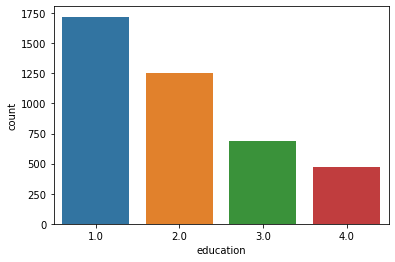

In [11]:
edu = sns.countplot(x="education", data = heart)

fill the 'education' missing values with the value 1 because this is the largest group

In [5]:
heart['education'].fillna(1, inplace = True)

In [6]:
heart.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Explore the Data

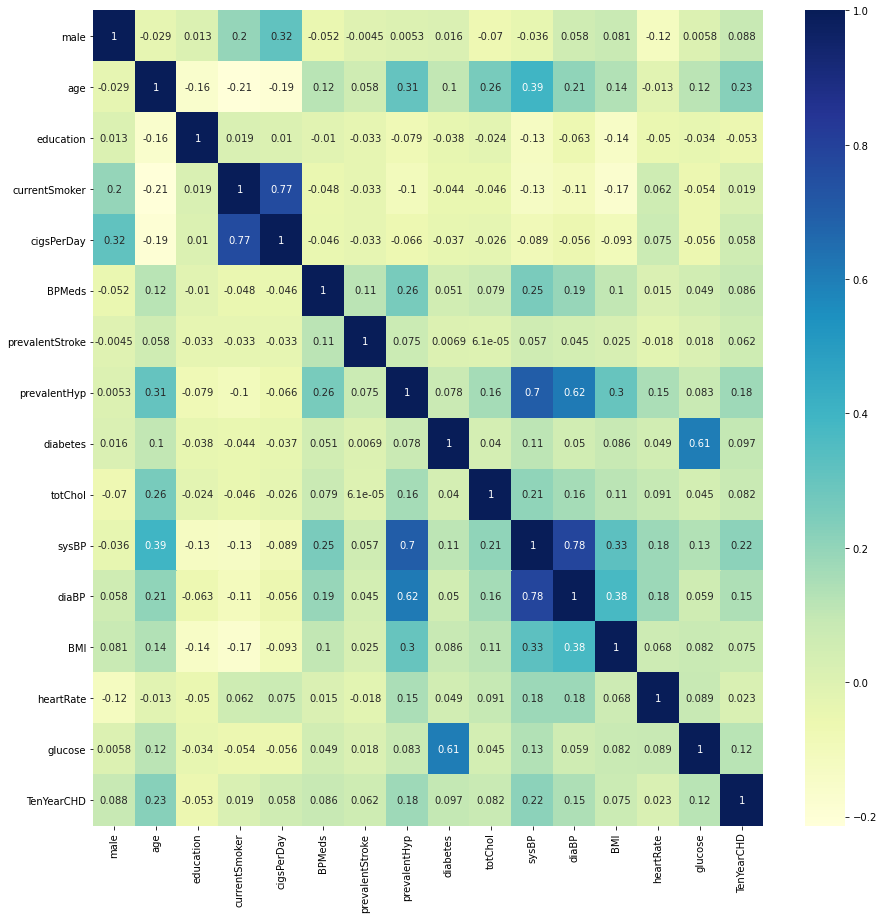

In [14]:
plt.figure(figsize=(15,15))
corrMatrix = heart.corr()
sns.heatmap(corrMatrix,cmap="YlGnBu", annot=True)
plt.show()

#### categorical features

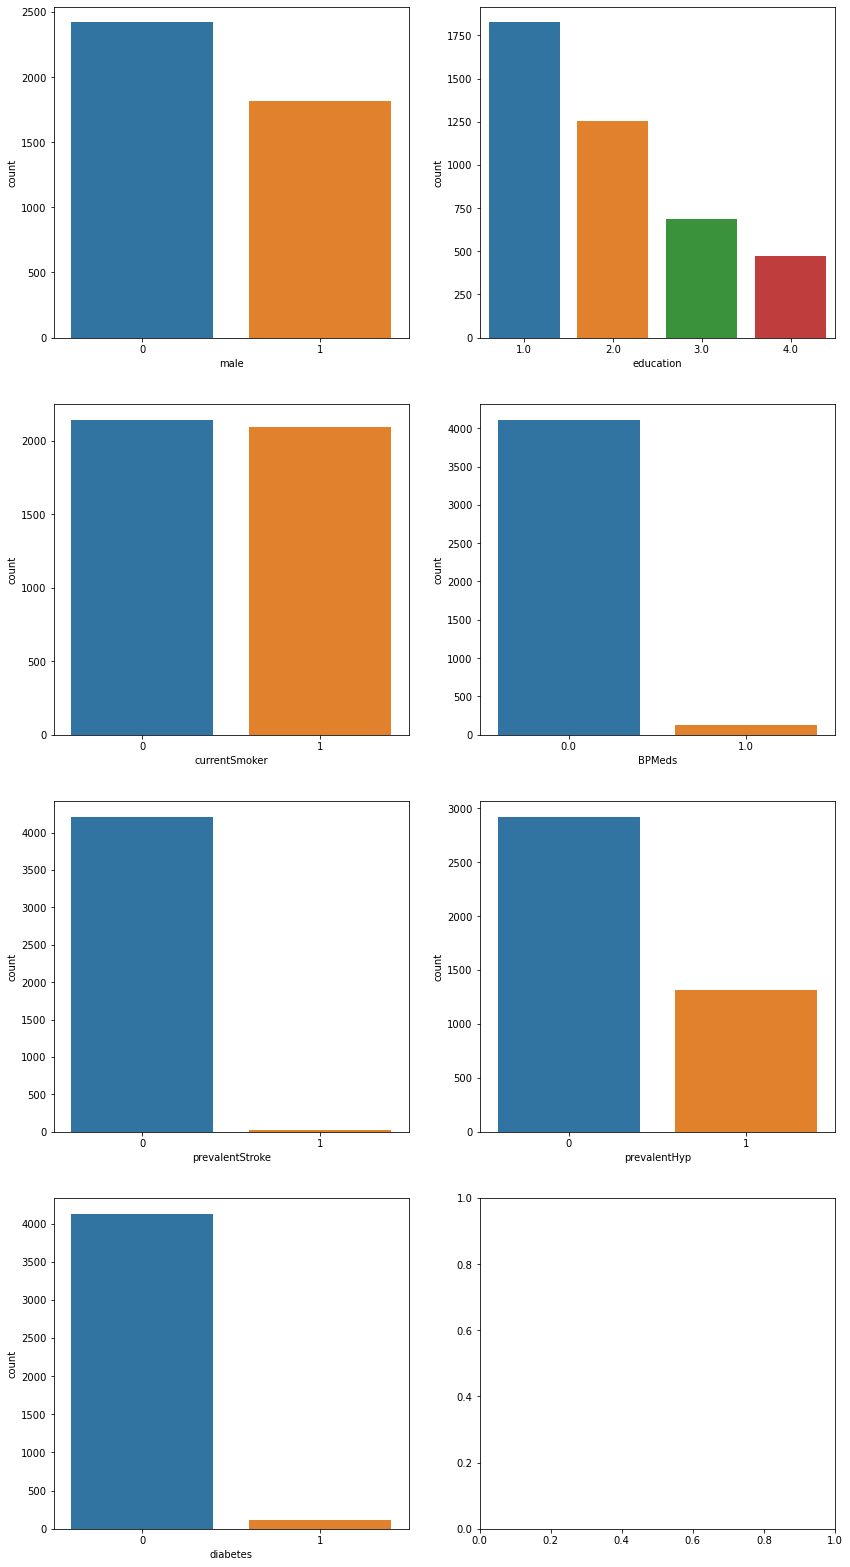

In [15]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols +1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,figsize=(7*total_cols, 7*total_rows))
for i, var in enumerate(categorical_features):
    row = i//total_cols
    col = i % total_cols
    plot = sns.countplot(x=var, data=heart, ax=axs[row][col])



The conclusions:

BPmeds, prevalentStroke and diabetes are highly imbalanced.<br>
There are four levels of education whereas the rest categorical features are all binary <br>
The number of Smokers and non-Smokers in currentSmoker is almost the same <br>

#### numerical features:

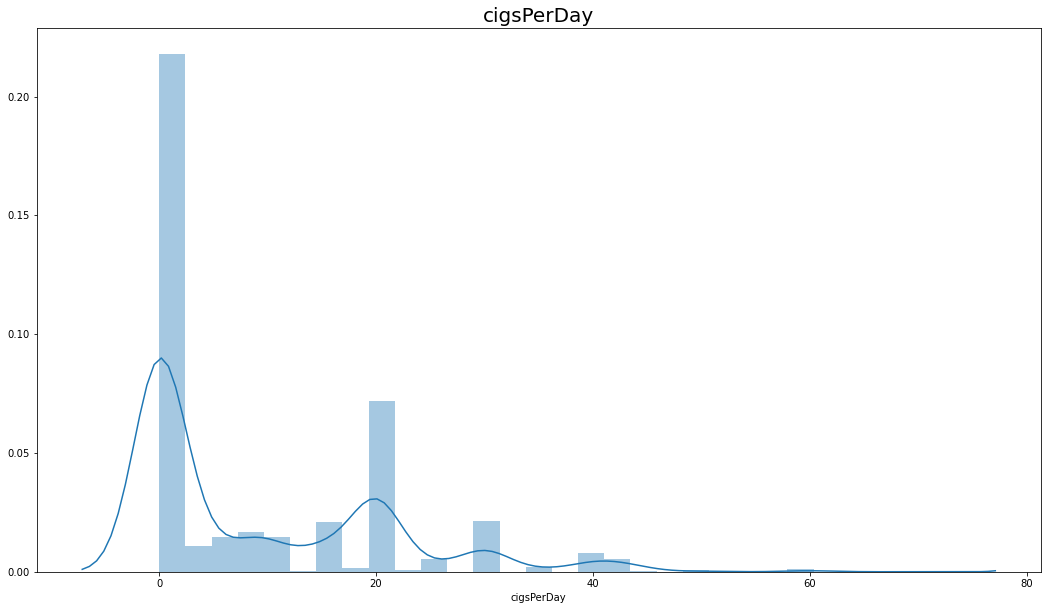

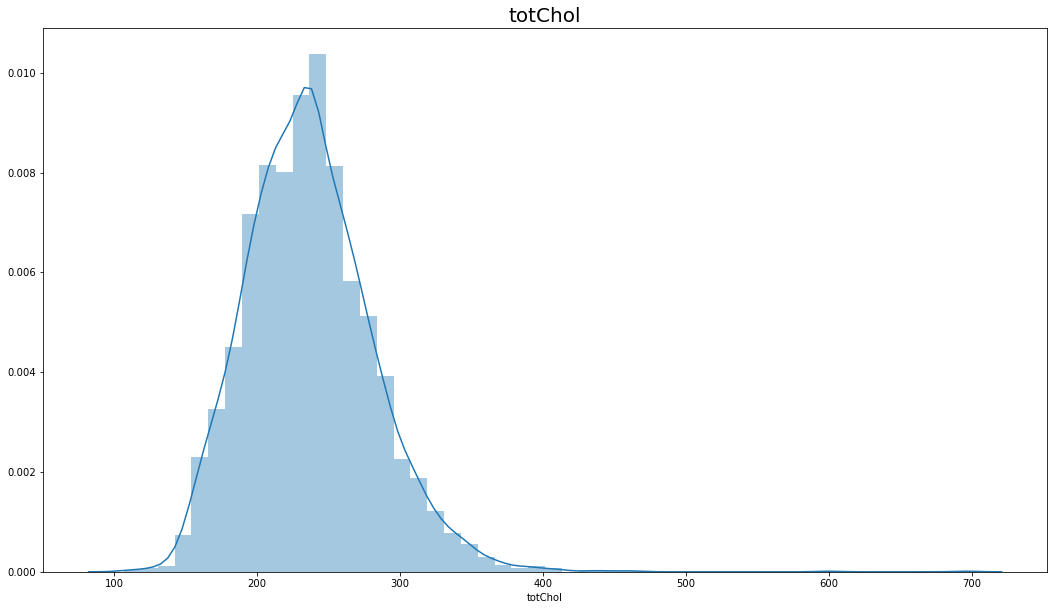

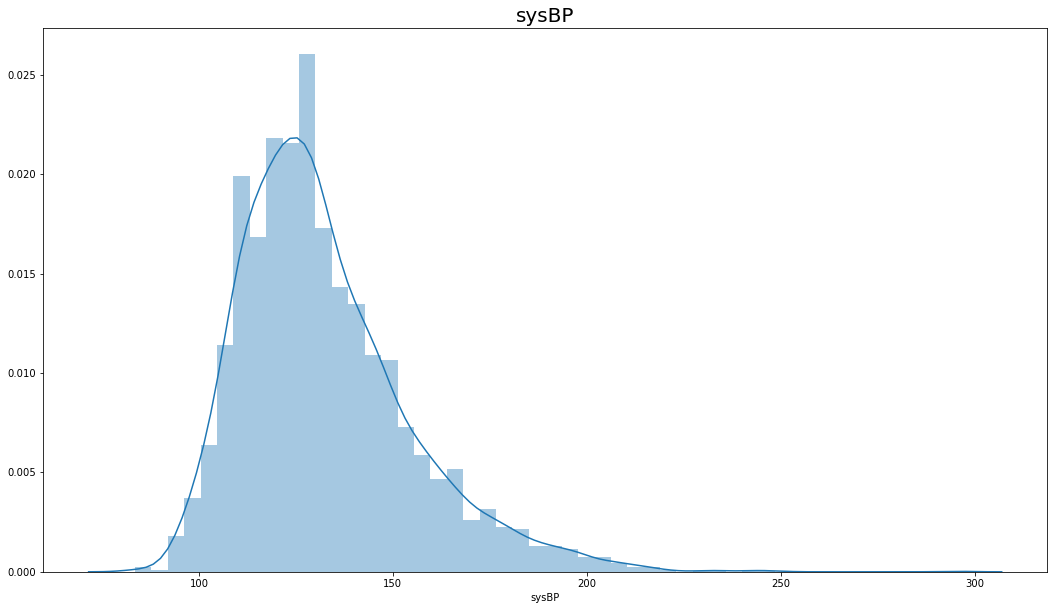

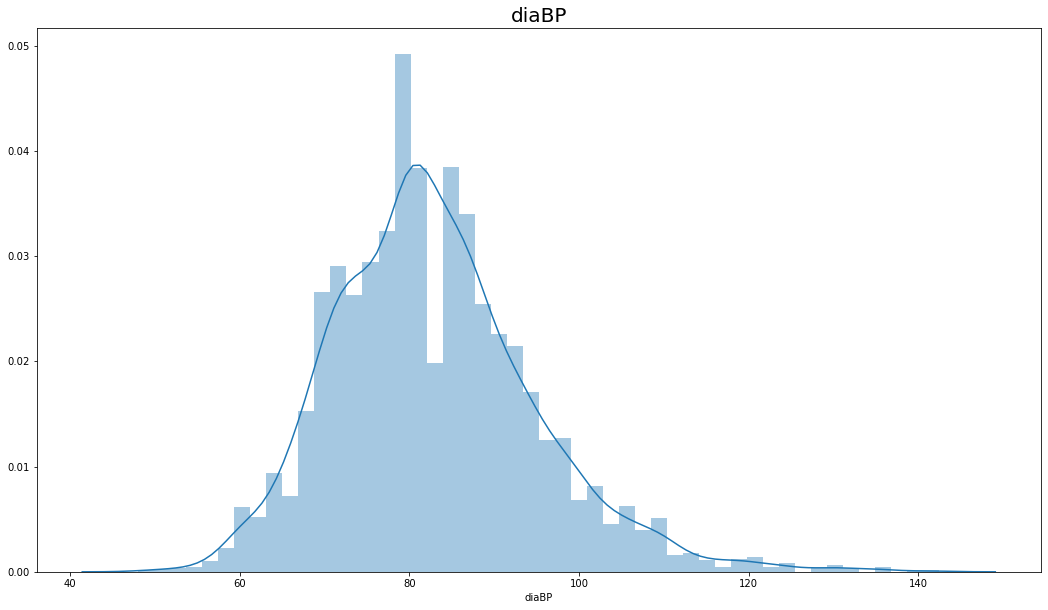

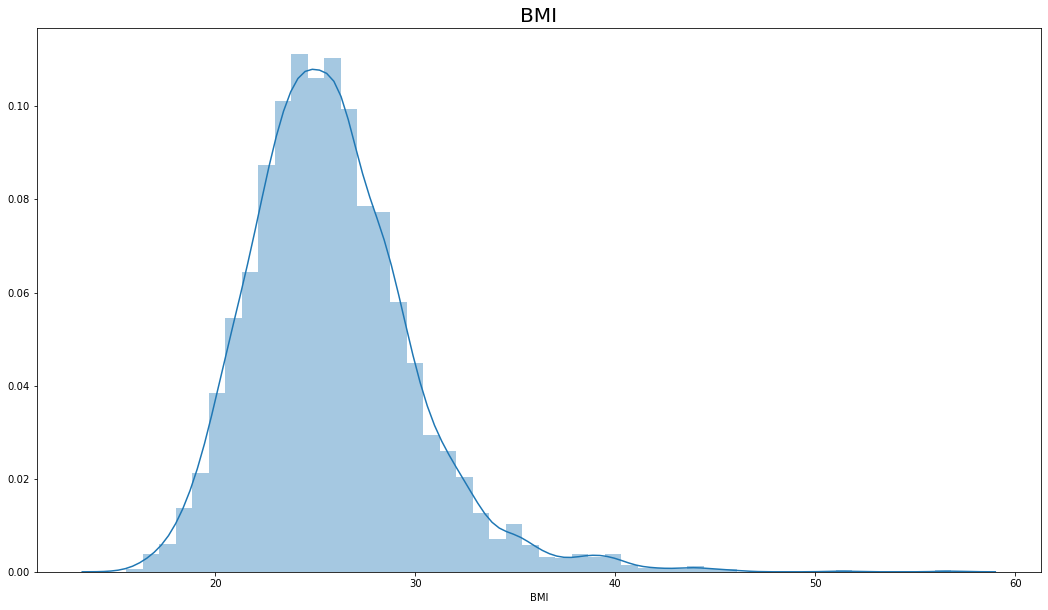

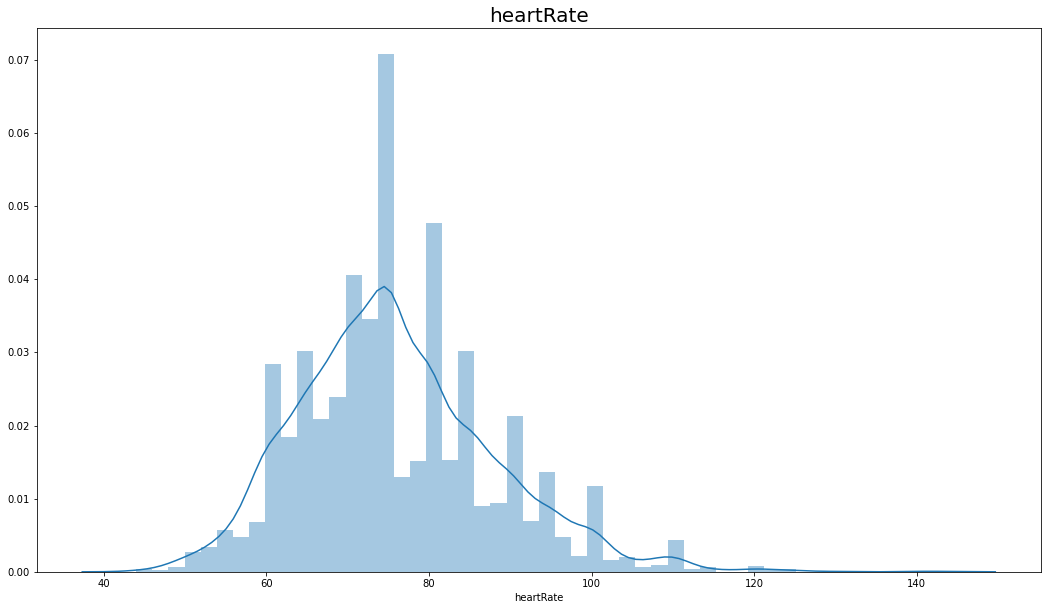

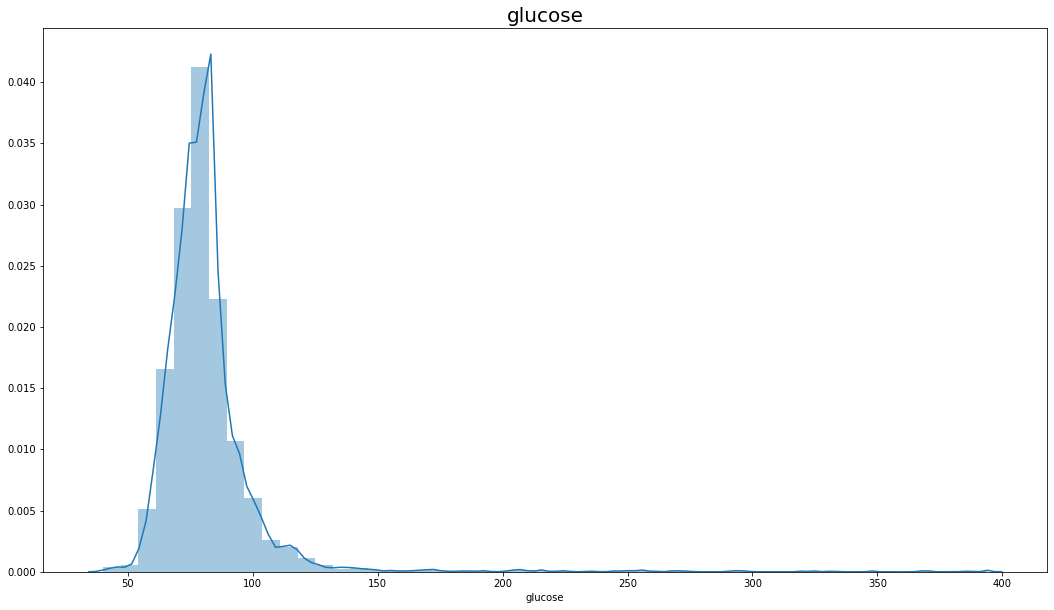

In [16]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10))
    sns.distplot(heart[feature])
    plt.title( feature, fontsize=20)
    plt.show()

The conclusions:

totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed <br>
cigsPerDay has a highly uneven distribution with the most data present in 0 <br>


#### target vairable

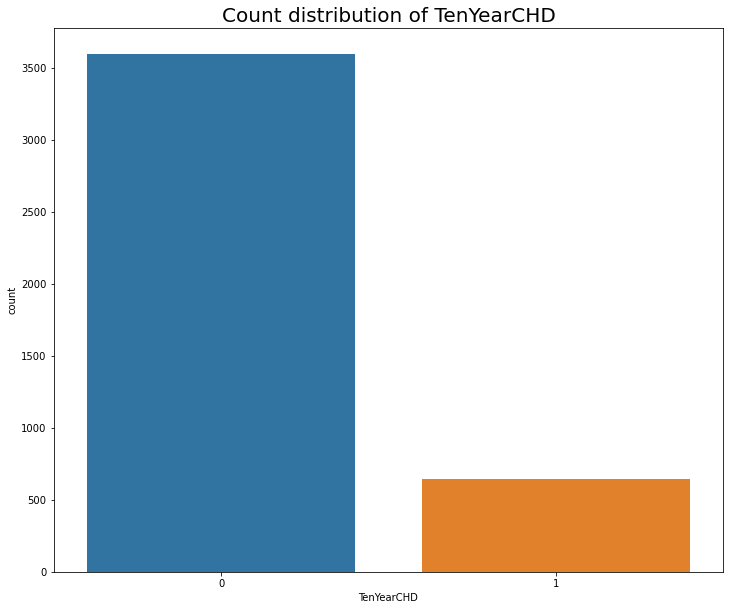

In [17]:
plt.figure(figsize=(12, 10))
sns.countplot(x="TenYearCHD", data=heart)
plt.title("Count distribution of TenYearCHD", size=20)
plt.show()


The distribution is highly imbalanced. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to taken care of.

Text(0, 0.5, 'TenYearCHD cases')

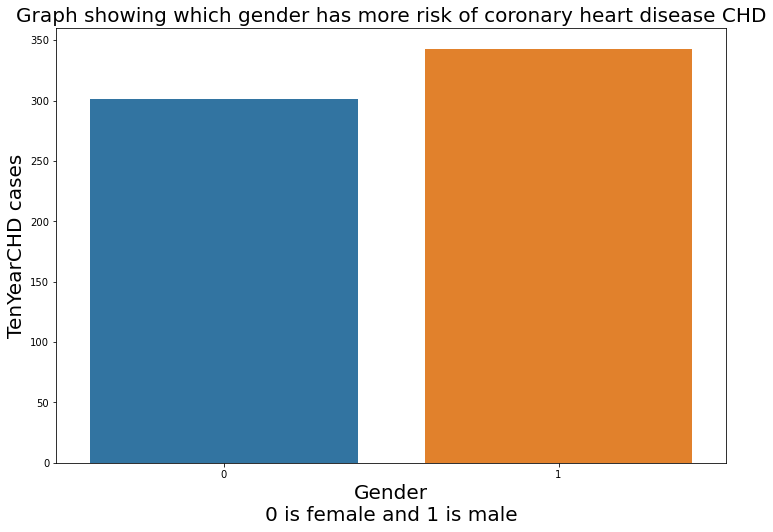

In [18]:
#checking for which gender has more risk of coronary heart disease CHD

graph_1 = heart.groupby("male", as_index=False).TenYearCHD.sum()
plt.figure(figsize=(12,8))
sns.barplot(x=graph_1["male"], y=graph_1["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)

According to this dataset, males have higher risk to heart disease TenYearCHD.

Text(0, 0.5, 'sysBP')

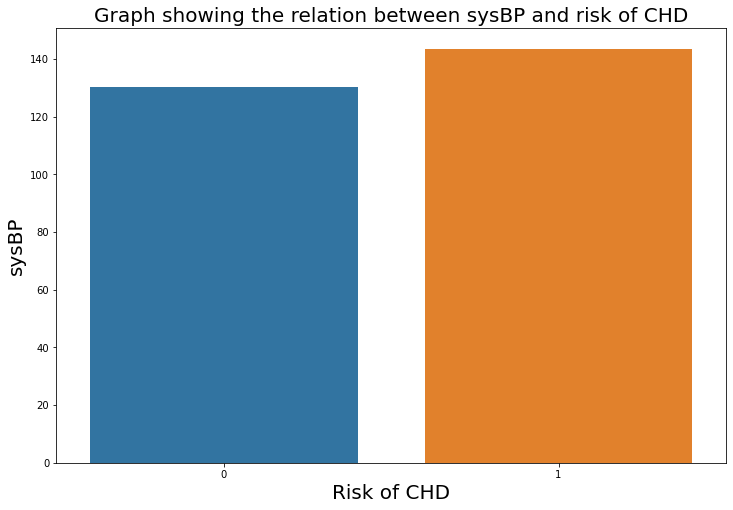

In [19]:
graph_2 = heart.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_2["TenYearCHD"], y=graph_2["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)

Text(0, 0.5, 'diaBP')

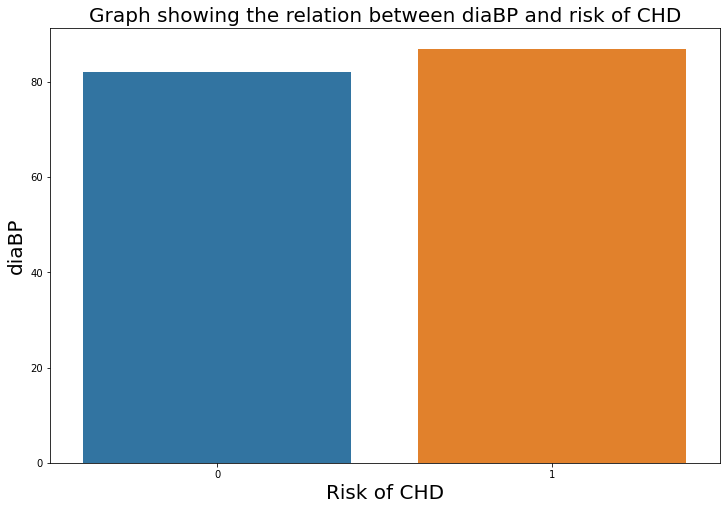

In [20]:
graph_3 = heart.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)

a nurmal blood pressure is below 130/80. a higher result is a risk factor for CHD

### Selected Feature


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
x = heart.drop(['TenYearCHD'], axis= 1)
y = heart['TenYearCHD']

# Using SelectKBest to extract top 10 features
topfeatures = SelectKBest(score_func = chi2, k = 10)
fit = topfeatures.fit(x, y)
xyscore = pd.DataFrame(fit.scores_)
xycolumn = pd.DataFrame(x.columns)

In [16]:
# Concatenate both DataFrames to get features and scores
featurescore = pd.concat([xycolumn, xyscore], axis = 1)

# rename columns feature score DataFrame
featurescore.columns = ["Feature", "Score"]
featurescore = featurescore.sort_values(by = "Score", ascending= False)
featurescore

,Feature,Score
10,sysBP,728.292522
14,glucose,390.755239
1,age,318.597444
9,totChol,234.335964
4,cigsPerDay,221.680719
11,diaBP,153.090954
7,prevalentHyp,92.167857
8,diabetes,39.103710
5,BPMeds,30.723031
0,male,18.915212


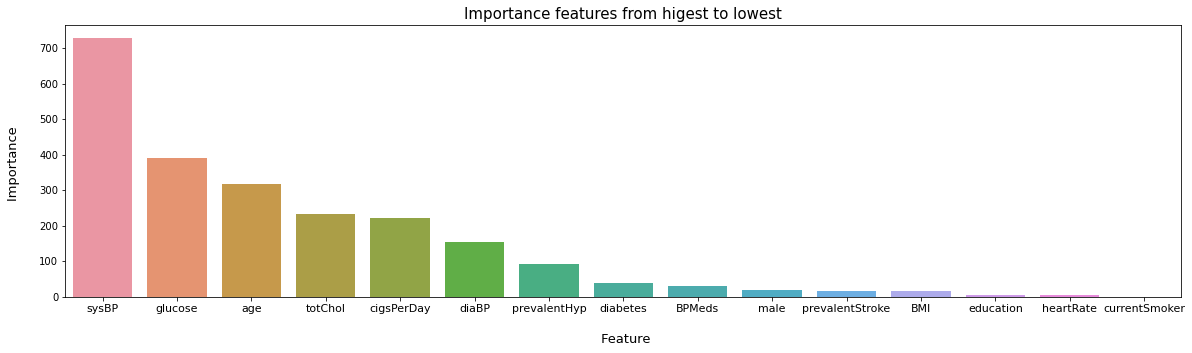

In [26]:
# Plotting the features based on scores
plt.figure(figsize= (20,5))
sns.barplot(x = "Feature", y = "Score", data = featurescore)
plt.title("Importance features from higest to lowest", fontsize = 15)
plt.xlabel("\n Feature", fontsize = 13)
plt.ylabel("Importance \n", fontsize = 13)
plt.xticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.show()

I want to keep those features that have the strongest relationship with the output variable. 

#### These 10 features are: 
Systolic Blood Pressure <br>
Glucose <br>
Age <br>
Cholesterin <br>
Cigarettes per Day <br>
Diastolic Blood Pressure <br>
Hypertensive <br>
Diabetes <br>
Blood Pressure Medication <br>
Gender <br>


In [7]:
# Create new dataframe with selected features
heart_s = heart[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
heart_s

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4233,179.0,86.0,50,313.0,1.0,92.0,1,0,0.0,1,1
4234,126.5,68.0,51,207.0,43.0,80.0,0,0,0.0,1,0
4235,131.0,86.0,48,248.0,20.0,72.0,0,0,0.0,0,0
4236,126.5,82.0,44,210.0,15.0,87.0,0,0,0.0,0,0


## The Models:

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import binarize
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [9]:
x = heart_s.drop(["TenYearCHD"], axis = 1)
y = heart_s["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2966, 10)
(1272, 10)
(2966,)
(1272,)


#### MinMax Scaler

In [10]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
heart_scale = pd.DataFrame(scaler.fit_transform(heart_s), columns=heart_s.columns)
heart_scale


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,0.106383,0.104520,0.184211,0.149406,0.000000,0.232804,0.0,0.0,0.0,1.0,0.0
1,0.177305,0.101695,0.368421,0.242784,0.000000,0.349206,0.0,0.0,0.0,0.0,0.0
2,0.208038,0.084746,0.421053,0.234295,0.285714,0.338624,0.0,0.0,0.0,1.0,0.0
3,0.314421,0.177966,0.763158,0.200340,0.428571,0.497354,1.0,0.0,0.0,0.0,1.0
4,0.219858,0.127119,0.368421,0.302207,0.328571,0.380952,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4233,0.451537,0.129944,0.473684,0.349745,0.014286,0.465608,1.0,0.0,0.0,1.0,1.0
4234,0.203310,0.079096,0.500000,0.169779,0.614286,0.338624,0.0,0.0,0.0,1.0,0.0
4235,0.224586,0.129944,0.421053,0.239389,0.285714,0.253968,0.0,0.0,0.0,0.0,0.0
4236,0.203310,0.118644,0.315789,0.174873,0.214286,0.412698,0.0,0.0,0.0,0.0,0.0


In [23]:
heart_s.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,132.352407,81.969797,49.584946,236.724870,9.003067,82.893464,0.310524,0.025720,0.029259,0.429212,0.151958
std,22.038097,22.836605,8.572160,44.326463,11.879230,11.910850,0.462763,0.158316,0.168552,0.495022,0.359023
min,83.500000,40.000000,32.000000,107.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,72.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,80.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,85.000000,56.000000,262.000000,20.000000,89.875000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,696.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


### KNN Model

The Accuracy score for 2 nearest neighbers is: 84.7%


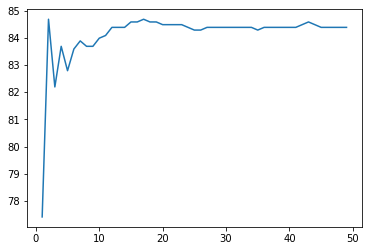

In [87]:
accuracy = []
for i in range (1,50):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn_fit = model_knn.fit(X_train, y_train)
    model_knn_pred = model_knn.predict(X_test)
    acc_knn = accuracy_score(y_test, model_knn_pred)
    accuracy.append(round(acc_knn,3)*100)
index = accuracy.index(max(accuracy))+1 
print("The Accuracy score for " + str(index) +" nearest neighbers is: " + str(max(accuracy)) +"%")
plt.plot(range(1,50),accuracy)
plt.show()

In [11]:
model_knn = KNeighborsClassifier(n_neighbors = 2)
model_knn_fit = model_knn.fit(X_train, y_train)
model_knn_pred = model_knn.predict(X_test)

In [35]:
# Confusion Matrix for test
confmat_knn = confusion_matrix(y_test, model_knn_pred)
print(f"Confusion Matrix:", "\n", confmat_knn)

print(classification_report(y_test, model_knn_pred))

Confusion Matrix: 
 [[1058   16]
 [ 178   20]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1074
           1       0.56      0.10      0.17       198

    accuracy                           0.85      1272
   macro avg       0.71      0.54      0.54      1272
weighted avg       0.81      0.85      0.80      1272



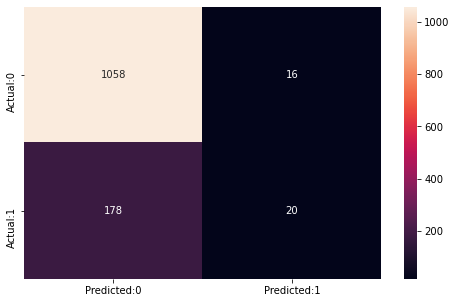

In [36]:
# Plotting Confusion Matrix
conf_matrix_knn = pd.DataFrame(data=confmat_knn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(pd.DataFrame(conf_matrix_knn), annot = True, fmt = "g")

The confusion matrix shows 1076+3= 1079 correct predictions and 193+0= 193 incorrect ones.

True Positives: 3

True Negatives: 1076

False Positives: 0 (Type I error)

False Negatives: 193 ( Type II error)

In [78]:
# cross validation
cross = cross_val_score(model_knn, X_train, y_train, cv=5, scoring="accuracy")
print(cross)
print(round(cross.mean(),5))

[0.84848485 0.8549747  0.84822934 0.85160202 0.85328836]
0.85132


In [79]:
#treshold
for i in range(1,5):
    cm2=0
    y_pred_prob_knn= model_knn.predict_proba(X_test)
    y_pred= binarize(y_pred_prob_knn,i/10)[:,1]
    conf= confusion_matrix(y_test,y_pred)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',conf,'\n',
            'with',conf[0,0]+conf[1,1],'correct predictions and',conf[1,0],'Type II errors( False Negatives)','\n\n')


C:\Users\tavor\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\tavor\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\tavor\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


With 0.1 threshold the Confusion Matrix is  
 [[461 613]
 [ 40 158]] 
 with 619 correct predictions and 40 Type II errors( False Negatives) 


With 0.2 threshold the Confusion Matrix is  
 [[871 203]
 [121  77]] 
 with 948 correct predictions and 121 Type II errors( False Negatives) 


With 0.3 threshold the Confusion Matrix is  
 [[1047   27]
 [ 181   17]] 
 with 1064 correct predictions and 181 Type II errors( False Negatives) 


With 0.4 threshold the Confusion Matrix is  
 [[1068    6]
 [ 191    7]] 
 with 1075 correct predictions and 191 Type II errors( False Negatives) 




C:\Users\tavor\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


I think that the best model with 0.1 treshold because I prefer that my model will have a higher sensitivity (low FN) over a higher specificity (low FP)

The Area Under Curve is 54.300000000000004%


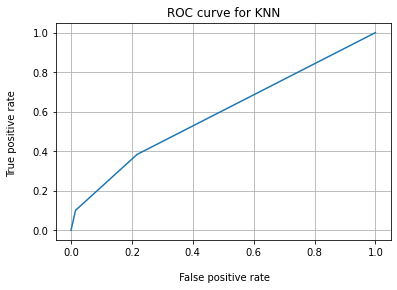

In [39]:
# ROC Curve
fpr, tpr, treshold = roc_curve(y_test, y_pred_prob_knn[:,1])
plt.plot(fpr,tpr)
plt.title('ROC curve for KNN')
plt.xlabel('\n False positive rate')
plt.ylabel('True positive rate \n')
plt.grid(True)

# Area Under Curve (AUC)
auc_knn = roc_auc_score(y_test, model_knn_pred)
print(f"The Area Under Curve is {round(auc_knn, 3)*100}%")

### Logistic Regression

In [12]:
model_lr = LogisticRegression()
model_lr_fit = model_lr.fit(X_train, y_train)
model_lr_pred = model_lr.predict(X_test)

# Accuracy of Model 
acc_lr = accuracy_score(y_test, model_lr_pred)
print("The Accuracy score for Logistic Regression Model is: " + str(round(acc_lr,3)*100) +"%")


The Accuracy score for Logistic Regression Model is: 84.6%


In [14]:
confmat_lr = confusion_matrix(y_test, model_lr_pred)
print(f"Confusion Matrix:", "\n", confmat_lr)

print(classification_report(y_test, model_lr_pred))

Confusion Matrix: 
 [[1067    6]
 [ 190    9]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1073
           1       0.60      0.05      0.08       199

    accuracy                           0.85      1272
   macro avg       0.72      0.52      0.50      1272
weighted avg       0.81      0.85      0.79      1272



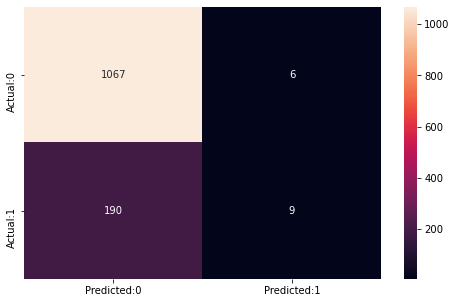

In [15]:
# Plotting Confusion Matrix
conf_matrix_lr = pd.DataFrame(data=confmat_lr,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(pd.DataFrame(conf_matrix_lr), annot = True, fmt = "g")

The confusion matrix shows 1082+12= 1093 correct predictions and 173+5= 178 incorrect ones.

True Positives: 12

True Negatives: 1082

False Positives: 5 (Type I error)

False Negatives: 173 ( Type II error)

In [43]:
# cross validation
cross = cross_val_score(model_lr, X_train, y_train, cv=5, scoring="accuracy")
print(cross)
print(round(cross.mean(),5))

[0.84848485 0.846543   0.84991568 0.846543   0.8549747 ]
0.84929


C:\Users\tavor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tavor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The Area Under Curve is 50.4%


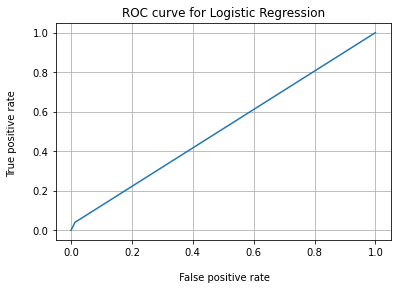

In [97]:
# ROC Curve
fpr, tpr, treshold = roc_curve(y_test, model_lr_pred)#y_pred_prob_lr[:,1])
plt.plot(fpr,tpr)
plt.title('ROC curve for Logistic Regression')
plt.xlabel('\n False positive rate')
plt.ylabel('True positive rate \n')
plt.grid(True)

# Area Under Curve (AUC)
auc_knn = roc_auc_score(y_test, model_knn_pred)
print(f"The Area Under Curve is {round(auc_knn, 3)*100}%")

#### as we can see the Logistic Regression and the KNN have almost the same accuracy, but the KNN Model is better

### finish first Semester!!

### start second Semester!!

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
 
from xgboost import XGBClassifier

In [17]:
X_train_scal = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)


In [18]:
X_test_scal = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)


### XGBoost

In [21]:
model_xgb = XGBClassifier()
model_xgb_fit = model_xgb.fit(X_train_scal,y_train)
model_xgb_pred = model_xgb.predict(X_test_scal)

acc_xgb = accuracy_score(y_test,model_xgb_pred)
print("The Accuracy score for XGBoost Model is: " + str(round(acc_xgb,3)*100) +"%")
print(classification_report(y_test, model_xgb_pred))

[17:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Accuracy score for XGBoost Model is: 84.0%
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1073
           1       0.46      0.15      0.22       199

    accuracy                           0.84      1272
   macro avg       0.66      0.56      0.57      1272
weighted avg       0.80      0.84      0.80      1272



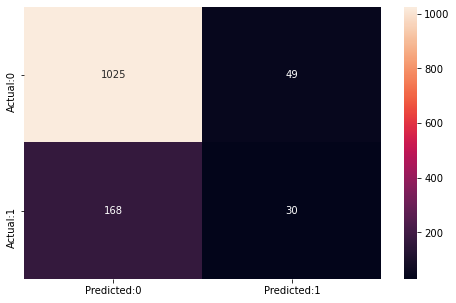

In [93]:
confmat_xgb = confusion_matrix(y_test, model_xgb_pred)

#plot confushion matrix
conf_matrix_xgb = pd.DataFrame(data=confmat_xgb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(pd.DataFrame(conf_matrix_xgb), annot = True, fmt = "g")

In [22]:
estimators = [('KNN', model_knn),('LR', model_lr),('XGB',model_xgb)]

### Stacking

In [23]:
stck = StackingClassifier(estimators= estimators)#, final_estimator=LogisticRegression())
stck_fit = stck.fit(X_train,y_train)
stck_pred = stck.predict(X_test)

acc_stck = accuracy_score(y_test,stck_pred)
print("The Accuracy score for Stacking Model is: " + str(round(acc_stck,3)*100) +"%")

[17:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Voting

In [63]:
vote = VotingClassifier(estimators= estimators)
vote_fit = vote.fit(X_train,y_train)
vote_pred = vote.predict(X_test)

acc_vote = accuracy_score(y_test,vote_pred)

print(classification_report(y_test, vote_pred))
print("The Accuracy score for Voting Model is: " + str(round(acc_vote,3)*100) +"%")

C:\Users\tavor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tavor\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1074
           1       0.55      0.08      0.14       198

    accuracy                           0.85      1272
   macro avg       0.70      0.53      0.53      1272
weighted avg       0.81      0.85      0.80      1272

The Accuracy score for Voting Model is: 84.7%


In [25]:
vote = VotingClassifier(estimators= estimators, voting = 'soft')
vote_fit = vote.fit(X_train,y_train)
vote_pred = vote.predict(X_test)

acc_vote = accuracy_score(y_test,vote_pred)

print(classification_report(y_test, vote_pred))
print("The Accuracy score for Voting Model is: " + str(round(acc_vote,3)*100) +"%")

[17:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1073
           1       0.40      0.09      0.14       199

    accuracy                           0.84      1272
   macro avg       0.63      0.53      0.53      1272
weighted avg       0.78      0.84      0.79      1272

The Accuracy score for Voting Model is: 83.7%


### Ada Boost

In [94]:
ada = AdaBoostClassifier(n_estimators= 250)
ada_fit = ada.fit(X_train_scal,y_train)
ada_pred = ada.predict(X_test_scal)

acc_ada = accuracy_score(y_test,ada_pred)

print(classification_report(y_test, ada_pred))
print("The Accuracy score for AdaBoost Model is: " + str(round(acc_ada,3)*100) +"%")

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1074
           1       0.43      0.09      0.15       198

    accuracy                           0.84      1272
   macro avg       0.64      0.53      0.53      1272
weighted avg       0.79      0.84      0.79      1272

The Accuracy score for AdaBoost Model is: 84.0%


### Bagging

In [96]:
bagging = BaggingClassifier(base_estimator= model_knn)
bagging_fit = bagging.fit(X_train_scal,y_train)
bagging_pred = bagging.predict(X_test_scal)

acc_bagging = accuracy_score(y_test,bagging_pred)

print(classification_report(y_test, bagging_pred))
print("The Accuracy score for Bagging Model is: " + str(round(acc_bagging,3)*100) +"%")

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1074
           1       0.67      0.01      0.02       198

    accuracy                           0.85      1272
   macro avg       0.76      0.50      0.47      1272
weighted avg       0.82      0.85      0.78      1272

The Accuracy score for Bagging Model is: 84.5%


### Gradient Boosting

In [76]:
grad = GradientBoostingClassifier()
grad_fit = grad.fit(X_train,y_train)
grad_pred = grad.predict(X_test)

acc_grad = accuracy_score(y_test,grad_pred)

print(classification_report(y_test, grad_pred))
print("The Accuracy score for GradientBoosting Model is: " + str(round(acc_grad,3)*100) +"%")

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1074
           1       0.47      0.08      0.13       198

    accuracy                           0.84      1272
   macro avg       0.66      0.53      0.52      1272
weighted avg       0.79      0.84      0.79      1272

The Accuracy score for GradientBoosting Model is: 84.3%


In [101]:
end = {'KNN':['84.7 %'],
       'Logistick Regression':['84.3 %'],
       'XGBoost':['83 %'],
       'AdaBoost':['84 %'],
       'Voting':['84.7 %'],
       'Stacking':['84.7 %'],
       'GradientBoosting':['84.3 %']}

dataF = pd.DataFrame(data= end, 
                     columns= ['KNN','Logistick Regression', 'XGBoost','AdaBoost','Voting','Stacking','GradientBoosting'],
                     index= ['Accuracy'])
dataF

,KNN,Logistick Regression,XGBoost,AdaBoost,Voting,Stacking,GradientBoosting
Accuracy,84.7 %,84.3 %,83 %,84 %,84.7 %,84.7 %,84.3 %


## The result: I can't improve the model, but Stacking and Voting Models got the same accuracy